In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Merge 12 Months of csv data

In [2]:
# Get all file name to the files variable
files = [file for file in os.listdir(r"C:\Personal\Python Practice\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

# create empty datafram
data = pd.DataFrame()

# Run loop to insert the dataframe into the empty dataframe
for file in files:
    df = pd.read_csv(r'C:\Personal\Python Practice\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\'+file)
    data = pd.concat([data,df])    # it will concat the data row wise/it will append the data
#     data = pd.concat([data,df],axis=1)   # it will concat the data column wise

In [3]:
# Reading the dataframe
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

##### Dropping Null values

In [4]:
# data[data.isna().any(axis=1)]   # to filter out the NA records
# data.dropna(How = "any",inplace=True,ignore_index=True)   # to drop rows where we have null values in "any" columns & to remove records with all columns null we will use "all"
data.dropna(inplace=True,ignore_index=True)   # to drop rows where we have null values

##### Dropping not required values

In [5]:
data['Month'] = data['Order Date'].str[0:2]

In [6]:
data.drop(data[data["Month"] == 'Or'].index,inplace=True) # index =1 to drop the column

## Question 1: What was the best month for sales? How much was earned that month?

###### changing data type of Price Each Column & Quantity Ordered column

In [7]:
data["Quantity Ordered"] = data["Quantity Ordered"].astype("float")
data["Price Each"] = data["Price Each"].astype("float")

###### Adding sales column

In [8]:
data["sales"]= data["Price Each"]*data["Quantity Ordered"]

##### Aggregating the Price Each column with grouping to Month

In [9]:
month_wise_sales = data.groupby(["Month"],as_index= False).agg({"sales":"sum"}).sort_values("Month",ascending =True)

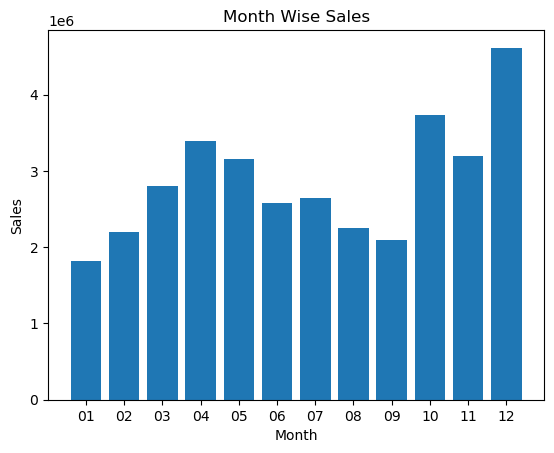

In [10]:
plt.bar(month_wise_sales["Month"],month_wise_sales["sales"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Month Wise Sales")
plt.show()

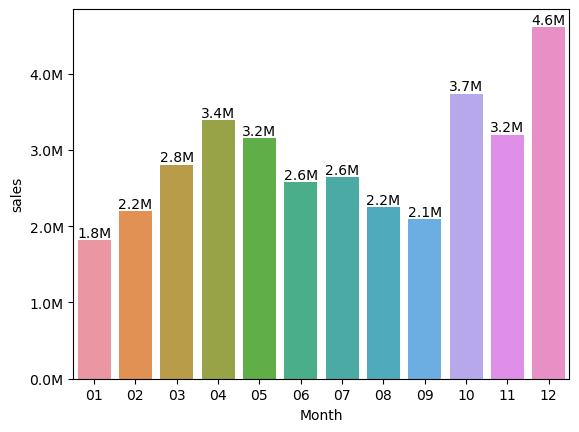

In [11]:
# Create the bar plot
months_data = sns.barplot(x="Month", y="sales", data=month_wise_sales)

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Apply the formatter to the y-axis
months_data.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Add data labels to the bars in millions
for bar in months_data.containers[0]:
    height = bar.get_height()
    months_data.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e6:.1f}M', ha='center', va='bottom')

# Show the plot
plt.show()


##### With the above analysis, we can see 12th month(December) has the highest sales

## Question 2: Which city had the highest number of sales?

In [12]:
data["City"] = data["Purchase Address"].str.split(",",expand = True)[1]    # to split on the basis of ","
data["State"] = data["Purchase Address"].str.split(",",expand = True)[2].str.strip().str[:2]
data["Address"] = data["City"] + "(" + data["State"]+')'    # concating the city & state
data.drop(["City","State"],axis=1,inplace=True)        # dropping the state & city column

In [13]:
city_sales = data.groupby(["Address"],as_index= False).agg({"sales":"sum"})

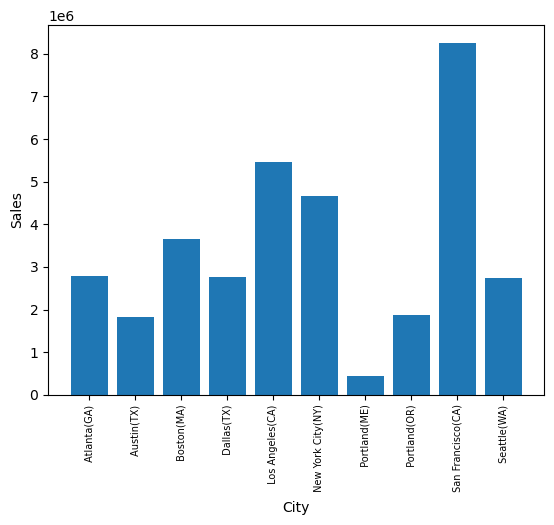

In [14]:
plt.bar(city_sales["Address"],city_sales["sales"])
plt.xticks(city_sales["Address"],rotation = 'vertical',size = 7)
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()

##### With the above analysis, we can see San Francisco city has the highest sales

## Question 3: Which time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
data["Order Date"] = pd.to_datetime(data["Order Date"])    # to convert to date time format

C:\Users\rahul\AppData\Local\Temp\ipykernel_16920\3643596656.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Order Date"] = pd.to_datetime(data["Order Date"])    # to convert to date time format


In [16]:
data["Hour"] = data["Order Date"].dt.hour

In [17]:
hour_groupby = data.groupby(["Hour"],as_index=False).count()

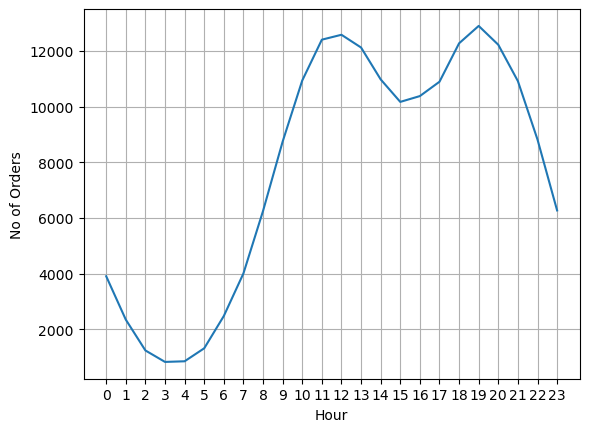

In [18]:
plt.plot(hour_groupby["Hour"],data.groupby(["Hour"])["sales"].count())
plt.xticks(hour_groupby["Hour"])
plt.xlabel("Hour")
plt.ylabel("No of Orders")
plt.grid()
plt.show()

## Question 4: What products are most often sold together?

In [122]:
dup_data= data[data["Order ID"].duplicated(keep = False)]

In [123]:
dup_data["Grouped"] = dup_data.groupby(["Order ID"])["Product"].transform(lambda x:",".join(x))


C:\Users\rahul\AppData\Local\Temp\ipykernel_16920\801158009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_data["Grouped"] = dup_data.groupby(["Order ID"])["Product"].transform(lambda x:",".join(x))


In [124]:
dup_data = dup_data[["Order ID","Grouped"]].drop_duplicates()

In [138]:
dup_data_grouping = dup_data.groupby(["Grouped"], as_index=False).agg("count").sort_values(by='Order ID', ascending=False)
dup_data_grouping[:1]

,Grouped,Order ID
342,"iPhone,Lightning Charging Cable",882


###### From the above analysis, we can see "iPhone" & "Lightning Charging Cable" are the products that are often sold together.

## Question 4: Which products sold the most?

In [169]:
data_product = data.groupby(["Product"],as_index=False).agg({"Quantity Ordered":"sum"})#.sort_values("Quantity Ordered",ascending=False)[:1]

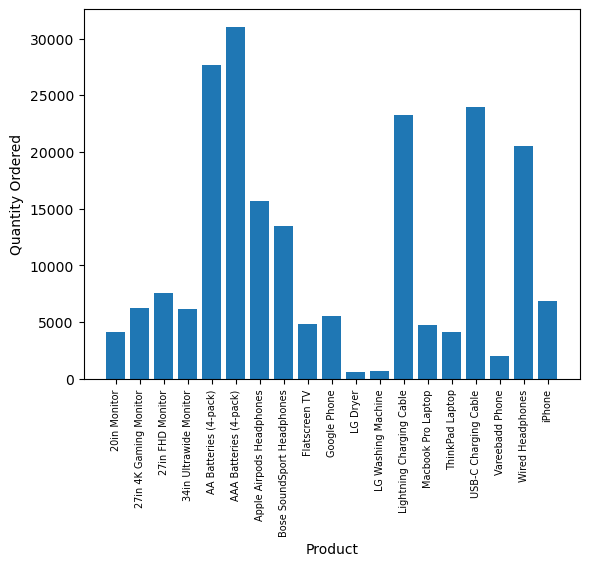

In [170]:
plt.bar(data_product["Product"],data_product["Quantity Ordered"])
plt.xticks(data_product["Product"],rotation = 'vertical',size = 7)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

In [175]:
data.groupby(["Product"],as_index=False).agg({"Quantity Ordered":"mean","Price Each":"mean"})#.sort_values("Quantity Ordered",ascending=False)[:1]

,Product,Quantity Ordered,Price Each
0,20in Monitor,1.006828,109.99
1,27in 4K Gaming Monitor,1.002247,389.99
2,27in FHD Monitor,1.005728,149.99
3,34in Ultrawide Monitor,1.002912,379.99
4,AA Batteries (4-pack),1.343004,3.84
5,AAA Batteries (4-pack),1.502689,2.99
6,Apple Airpods Headphones,1.007203,150.00
7,Bose SoundSport Headphones,1.009906,99.99
8,Flatscreen TV,1.003958,300.00
9,Google Phone,1.001267,600.00


###### From the above analysis, we can see "AAA Batteries (4-pack)" is the most selling product because it is the cheapest product